<a href="https://colab.research.google.com/github/nurfnick/Numerical_Methods/blob/master/WeBWorK7HomeworkHelper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WeBWorK 7 Homework Helper

## WeBWorK 1

The rectangles in the graph below illustrate a left endpoint Riemann sum for $f(x)=−\frac {x^2}4+2x$ on the interval $[2,6]$.
The value of this left endpoint Riemann sum is?

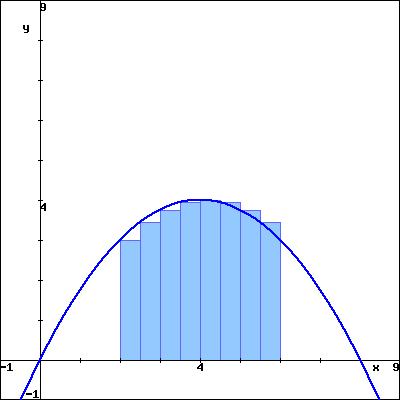




Here there are 8 rectangles using the left value.  Let's define the function and preform the sum.

In [3]:
def f(x):
  return -x**2/4+2*x

sum =0
for i in range(8):
  sum = sum + (6-2)/8*f(2+i*(6-2)/8)

sum

14.625

The rectangles in the graph below illustrate a right endpoint Riemann sum for f(x)=−x24+2x on the interval [2,6].
The value of this right endpoint Riemann sum is?

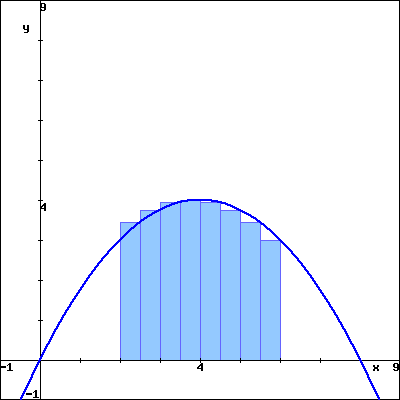

Again 8 rectangles but right endpoints.  I'll just shift my for loop to start at 1.

In [4]:
sum =0
for i in range(1,9):
  sum = sum + (6-2)/8*f(2+i*(6-2)/8)

sum

14.625

Using the left and right Riemann sums above, we definitively conclude that

 $$
 
 ≤\int_2^4−\frac{x^2}4+2x\ dx≤ 
$$


 $$
 
 ≤\int_4^6−\frac{x^2}4+2x\ dx≤ 
$$




 $$
 
 ≤\int_2^6−\frac{x^2}4+2x\ dx≤ 
$$


There are several things to do here.  Neither of the previous was it clear if they were an over or under estimate BUT on $[2,4]$ the first was under and the second over!  Let's redo those!

In [5]:
sum =0
for i in range(4):
  sum = sum + (6-2)/8*f(2+i*(6-2)/8)

sum #Under estimate

7.0625

In [6]:
sum =0
for i in range(1,5):
  sum = sum + (6-2)/8*f(2+i*(6-2)/8)

sum #over estimate

7.5625

For the second bounds I do something similar

In [7]:
sum =0
for i in range(4,8):
  sum = sum + (6-2)/8*f(2+i*(6-2)/8)

sum #over estimate (left points)

7.5625

In [8]:
sum =0
for i in range(5,9):
  sum = sum + (6-2)/8*f(2+i*(6-2)/8)

sum #Under estimate (right points)

7.0625

All that is left is the bound on the last integral!  They are simply the sum of the previous bounds!  2*7.0625 and 2*7.5625

In [9]:
print( 2*7.0625, 2*7.5625)

14.125 15.125


## WeBWorK 6

Using the graph of $3+\cos(5x)$, for $0\leq x\leq \frac{3\pi}5$, list the following quantities in increasing order:

1. the value of the integral $\int_0^{\frac{3\pi}5}(3+\cos(5x))dx$,
2. the left sum with n=3 subdivisions, and
3. the right sum with n=3 subdivisions.

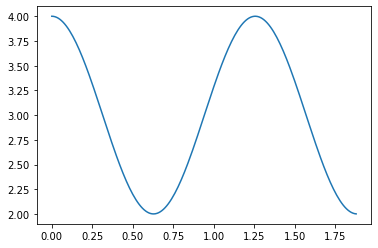

In [13]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0,3*np.pi/5,.01)
y = 3+np.cos(5*x)
plt.plot(x,y)

So I thought by looking at the graph I would know how the function behaves but I don't!  Let's compute the three points for each division!

In [21]:
x2 = np.linspace(0,3*np.pi/5,4)
y2 = 3+np.cos(5*x2)

Text(0.5, 1.0, 'Left End Points')

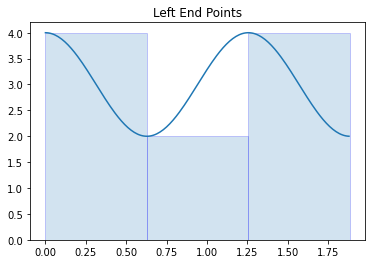

In [23]:
plt.bar(x2[:-1],y2[:-1],width = np.pi/5, alpha = 0.2, align = 'edge', edgecolor = 'b')
plt.plot(x,y)
plt.title('Left End Points')

Text(0.5, 1.0, 'Right End Points')

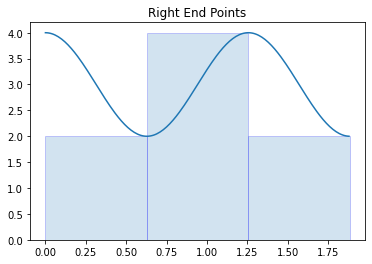

In [26]:
plt.bar(x2[1:],y2[1:],width = -np.pi/5, alpha = 0.2, align = 'edge', edgecolor = 'b')
plt.plot(x,y)
plt.title('Right End Points')

So clearly the left end points are an over estimation, right are an under estimation!  I'll use python to compute the integral even though I could do it by hand...

In [31]:
from scipy import integrate

integrate.quad(lambda x: 3+np.cos(5*x),0,3*np.pi/5)

(5.654866776461628, 6.278163296415537e-14)